## 1. Problem Definition:

> Given clinical parameters about a patient, is it possible to predict whether or not they have heart disease?

## 2. Data

https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data


## 3. Evaluation

> After running some experiments as a proof of concept (that is, the problem which is being annalysed can actually be solved using a machine learning algorithm), an evaluation of the model must be made. In this case, in order to judge the model aceptable the accuracy will need to be higher than 95%. 

## 4. Features

This is the step where we get used to the data we're working on. Whats does each feature of the dataset represent??

### 4.1 - Creating a data dictionary:

- id (Unique id for each patient)
- age (Age of the patient in years)
- origin (place of study)
- sex (Male/Female)
- cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
- trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
- chol (serum cholesterol in mg/dl)
- fbs (if fasting blood sugar > 120 mg/dl) rest ecg (resting electrocardiographic results)-- Values: [normal, stt abnormality, lv hypertrophy]
- thalach: maximum heart rate achieved
-  exang: exercise-induced angina (True/ False)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by fluoroscopy
- thal: [normal; fixed defect; reversible defect]
- num: the predicted attribute

### 4.2 Environment set up

> In this project pandas, matplotlib and numpy will be used for data manipulation, as well as SciKitLearn for the macine learning models.

In [80]:
# Regular EDA (Exploratory Data Analysis) tools:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models From Sci-Kit-Learn:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations:

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, roc_curve, auc

SyntaxError: invalid syntax (1374955998.py, line 22)

### 4.3 Loading Data

In [2]:
df = pd.read_csv("heart-disease.csv")

df.shape

(303, 14)

### 4.4 Exploratory Data Analysis:

Getting to know how the features relate to the target variable

1. What questions are trying to be solved?
2. What are the different data types and how they are dealt with?
3. What's missing from the data and how this is dealt with?
4. Where are the outliers and what will be done about them?
5. Is it possible to add, remove or change features to get more out of the data?

In [3]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
# How many of each class in the target column are there?

df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

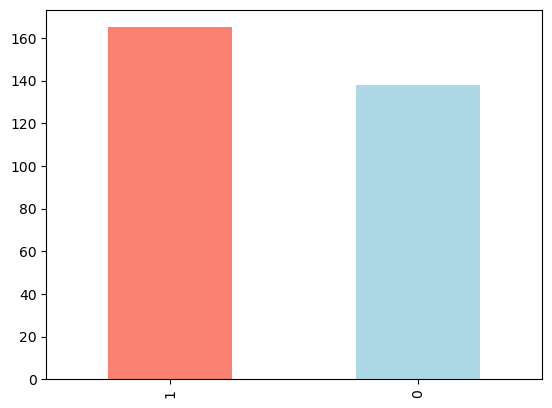

In [6]:
#Visualisation is an important tool to use to better comunicate the work:

df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

Trying to see if there's a correlation between these features

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
# Comparing target column with sex column

pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


From this comparison only, it's already possible to infer that if a patient is a woman, there's roughly a 75% chance that they'll have heart disease. If the patient is a male, there's roughly a 50% chance that they'll have heart disease. Considering both sexes, there's roughly a 55% chance for heart disease.

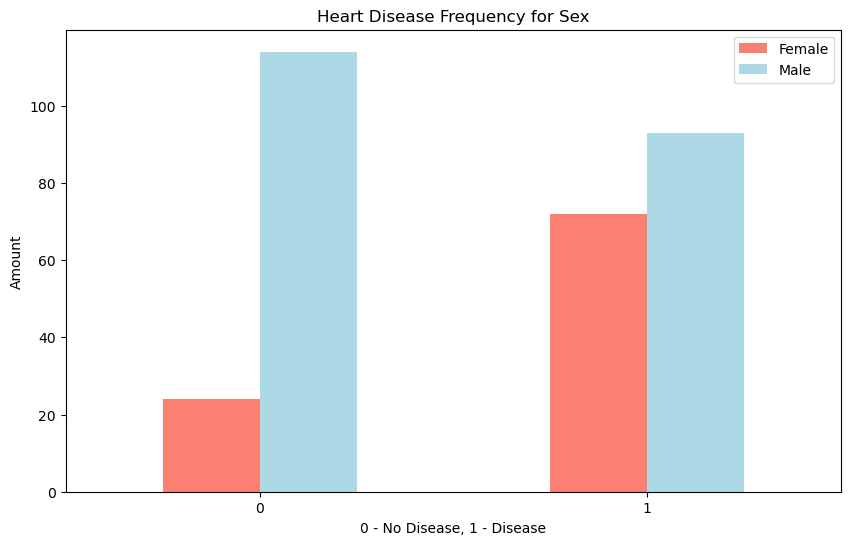

In [12]:
# Plotting the crosstab:

pd.crosstab(df.target,df.sex).plot(kind="bar",
                                  color=["salmon", "lightblue"],
                                  figsize=(10,6))

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 - No Disease, 1 - Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);


In [13]:
df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

### Age vs Max Heart Rate for Heart Disease

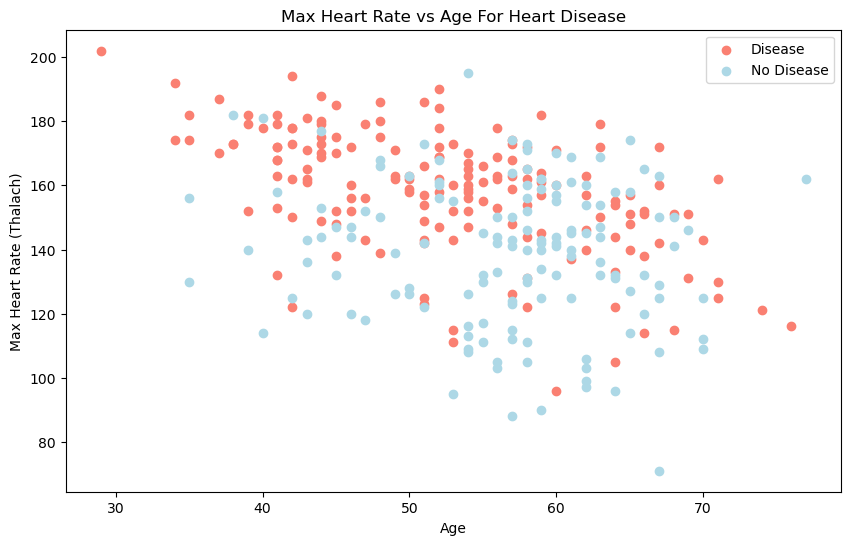

In [14]:
# Creating Another figure:

plt.figure(figsize=(10,6))

# Scatter plot with positive examples:

plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           color="salmon");

# Scatter wiht negative examples:

plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           color="lightblue");

# Comunicating the work:

plt.title("Max Heart Rate vs Age For Heart Disease")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate (Thalach)")
plt.legend(["Disease","No Disease"]);

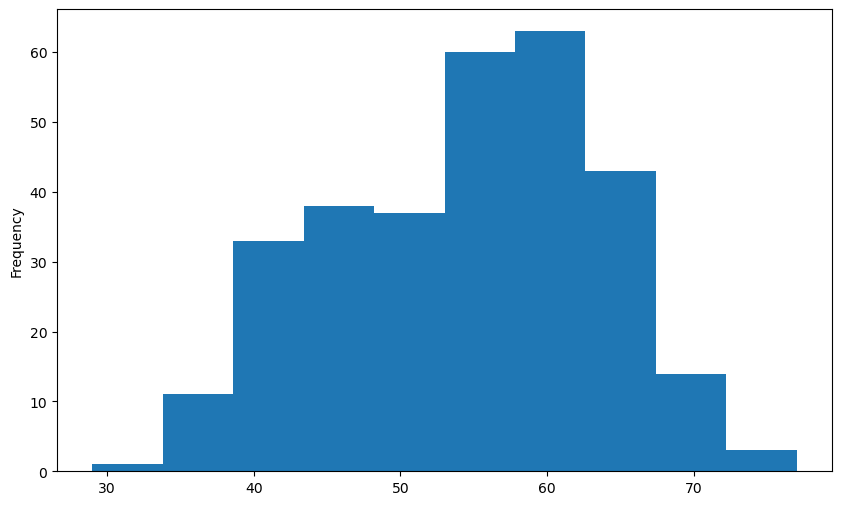

In [15]:
# Checking the distribution of heart disease through the ages:

plt.figure(figsize=(10,6))

df.age.plot.hist();

### Heart Disease Frequency per Chest pain type:

- cp: chest pain type 
 - 0: Typical angina (chest pain due to heart disease)
 - 1: Atypical angina (chest pain not due to heart disease)
 - 2: Non-anginal (chest pain not related to the heart)
 - 3: Asymptomatic (chest pain not showing signs of disease)

In [16]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


From this analysis, the highest number of patients with heart disease were in cathegory 2 of chest pain, which is odd. In this scenario, another person wiht more experience in the are must be consulted to explain the reason for that.

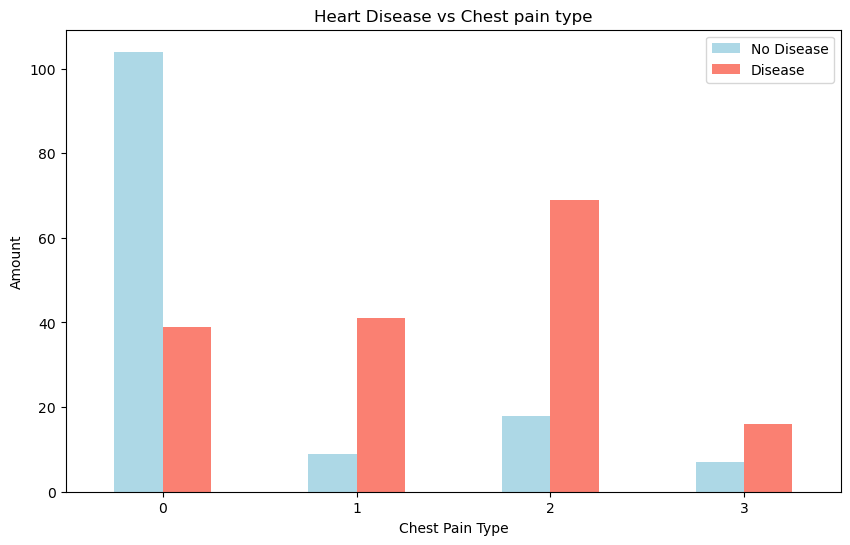

In [17]:
# Visualising:

pd.crosstab(df.cp,df.target).plot(kind="bar",
                                 color=["lightblue","salmon"],
                                 figsize=(10,6));

plt.title("Heart Disease vs Chest pain type")
plt.xlabel("Chest Pain Type")
plt.xticks(rotation=0)
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"]);

### Making a Correlation Matrix

Seeing if there's some kind of correlation between the independent variables.

In [18]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


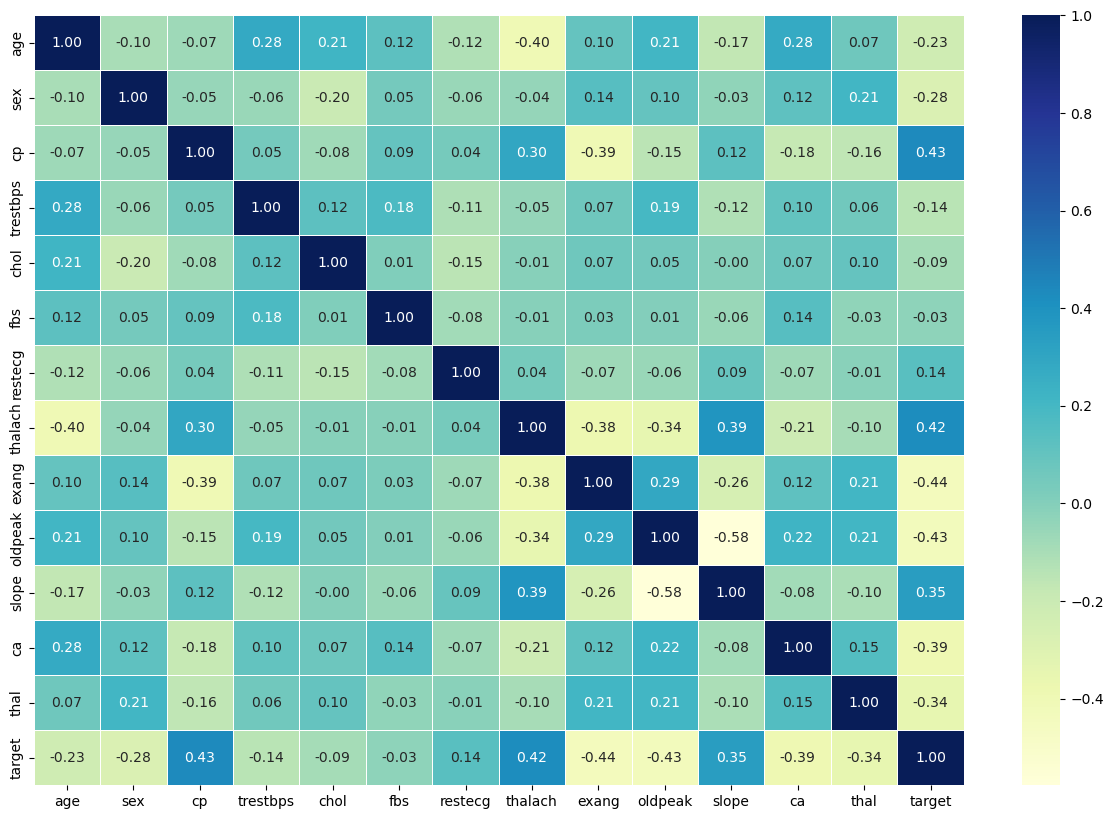

In [19]:
# Making it more visual

corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(15,10))

ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidth=0.5,
                fmt=".2f",
                cmap="YlGnBu")

A higher positive number implies a stronger positive correlation (increase). A higher negative value implies a stronger negative correlation (decrease).

E.G: The higher the cp value, the higher the target value.

## 5. Modelling

In [20]:
# Splitting into X and y

X = df.drop('target',axis=1)

y = df.target

In [21]:
#Splitting into train and test sets:

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [23]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

After splitting the data, it's time to set up the ML Model.

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

KNeighbors: https://scikit-learn.org/stable/modules/neighbors.html

RandomForest: https://scikit-learn.org/stable/modules/ensemble.html

LogisticalRegression:https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [35]:
# Putting models into a dictionary (to speed up testing and scoring)

models ={"Logistic Regression": LogisticRegression(),
        "KNN": KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier()}

# Creating a function to fit and score models:

def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates different ML models from test and training data.
    
    models: dictionary of models
    X_train: training data, no labels
    X_test: test data, no labels
    y_train: training labels
    y_test: test labels
    '''
    # Setting a random seed:
    
    np.random.seed(42)
    
    # Putting the results into a dictionary:
    
    model_scores = {}
    
    # Loop through models:
    
    for name, model in models.items():
        
        # Fit the model to the data:
        
        model.fit(X_train, y_train)
        
        # Evaluate and store the score in model_scores
        
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores


In [36]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

model_scores

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this 

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model comparison:

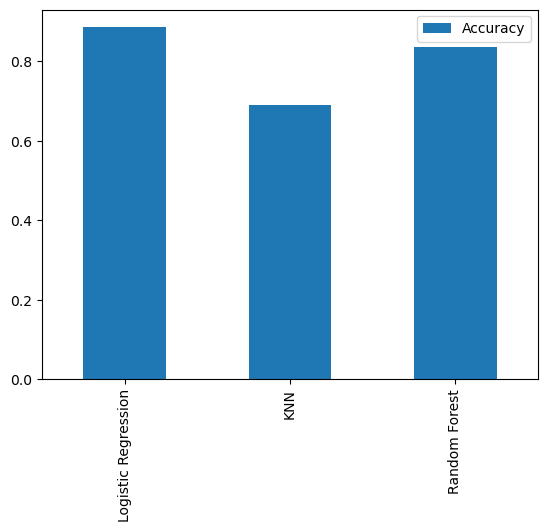

In [40]:
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])

model_compare.T.plot(kind="bar");

Now that there's a baseline model, it is time to tune it to improve its score.

Will be analysed:

* Hyperparameter tuning
* Feature importance
* Confusion Matrix
* Cross Validation
* Precision, recall, F1 score and classification report
* ROC curve
* Area unde the curve (AUC)

### Hyperparameter tuning (by hand):



In [42]:
# Tuning KNN:

train_scores = []

test_scores = []

# Creating a list of different values for the hyperp. "n-neighbors":

neighbors = range(1,21)

# Setting KNN instance:

knn = KNeighborsClassifier()

# Loop through different n-neighbors:

for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Fit the algorithm:
    
    knn.fit(X_train, y_train)
    
    # Update training scores:
    
    train_scores.append(knn.score(X_train, y_train))
    
    # Update test scores:
    
    test_scores.append(knn.score(X_test, y_test))
    


C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [44]:
train_scores

test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN Score on the test data: 75.41%


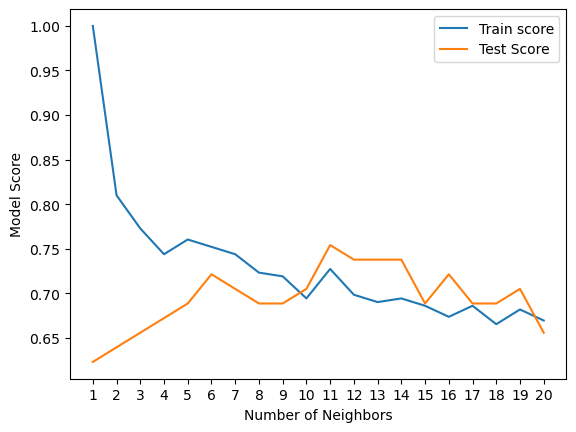

In [49]:
plt.plot(neighbors, train_scores, label='Train score')
plt.plot(neighbors, test_scores, label = 'Test Score');
plt.xticks(range(1,21,1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN Score on the test data: {max(test_scores)*100:.2f}%")

### Hyperparameter tuning with RamdomizedSearchCV:

The RandomForestClassifier() and the LogisticRegression() models will be tuned using RamdomizedSearchCV

In [55]:
# Creating a Hyperparameter grid for Logistic regression:

log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

# Creating Hyperparameter grid for Random Forest:

rf_grid = {"n_estimators": np.arange(10,1000,50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}

In [51]:
# Tuning LogisticRegression():

np.random.seed(42)

# Setting up hyperp. search for LogisticRegression():

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fitring random hyperp. search model for LogisticRegression:

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [52]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [53]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [56]:
# Tuning the random forest model:

# Setting up a random seed:

np.random.seed(42)

# Applying RSCV:

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          verbose=True,
                          n_iter=20)
# Fitting the models:

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [57]:
# Getting the best hyperparameters:

rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [58]:
rs_rf.score(X_test, y_test)

0.8688524590163934

Now that is known that hyperparameter tuning could actually improve one of the models using RandomizedSearchCV, it's possible to use GridSearchCV, which exhaustively tests hyperparameters to find the best ones.

### Hyperparameter tuning using GridSearchCV:

Since the LogisticRegression() model showed the best results, the GridSearchCV method will be applied to try to find the best possible parameters for this model.

In [60]:
# Different hyperp. for Logistc Regression:

log_reg_grid = {"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear"]}

# Set up GSCV for LogReg:

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fitting the model:

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [61]:
# Finding the best parameters:

gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [62]:
# Evaluating the GS LogReg:

gs_log_reg.score(X_test,y_test)

0.8852459016393442

## Evaluating the tuned model beyond accuracy:

* ROC Curve and AUC
* Confusion Matrix
* Precision, recall, F1 score and classification report

If possible, using cross-validation

To make comparisons and evaluate the model, first it's necessary to make predictions


In [63]:
# Making predictions with the tuned model:

y_preds = gs_log_reg.predict(X_test)

In [64]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [65]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

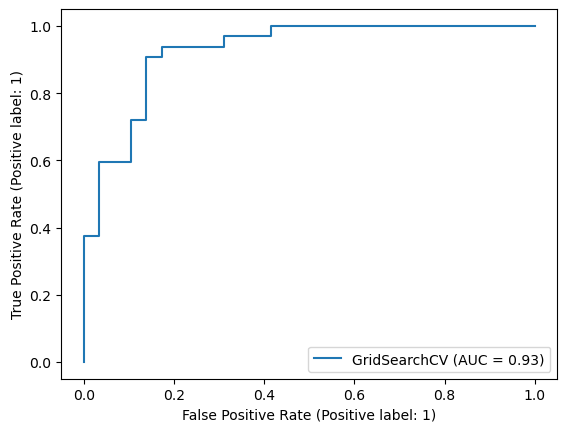

In [82]:
# Ploting a ROC Curve and calculating AUC metric:

#RocCurveDisplay.from_predictions(y_preds,y_test)

RocCurveDisplay.from_estimator(gs_log_reg,X_test,y_test)

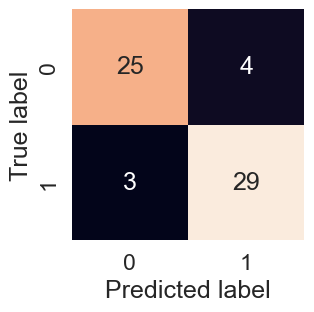

In [83]:
# Confusion Matrix:

sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

In [85]:
# Generating a cross-validated classification report:

#Checking the best parameters:

gs_log_reg.best_params_

#Creating a classifier with the best parameters:

clf = LogisticRegression(C=0.20433597178569418, 
                         solver='liblinear')

0.8446994535519124

In [86]:
# Cross-validated accuracy:

cv_acc = cross_val_score(clf,
                         X,
                         y,
                        cv=5,
                        scoring="accuracy")

cv_acc = np.mean(cv_acc)

cv_acc

0.8446994535519124

In [88]:
# Cross-validated precision:

cv_pre = cross_val_score(clf,
                         X,
                         y,
                        cv=5,
                        scoring="precision")
cv_pre = np.mean(cv_pre)

cv_pre

0.8207936507936507

In [90]:
# Cross-validated recall:

cv_recall = cross_val_score(clf,
                         X,
                         y,
                        cv=5,
                        scoring="recall")
cv_recall = np.mean(cv_recall)

cv_recall


0.9212121212121213

In [91]:
# Cross-validated f1-score:

cv_f1 = cross_val_score(clf,
                         X,
                         y,
                        cv=5,
                        scoring="f1")
cv_f1 = np.mean(cv_f1)

cv_f1

0.8673007976269721

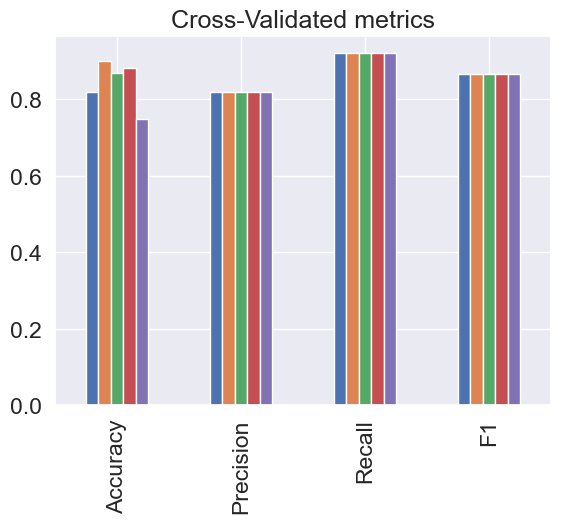

In [103]:
# Visualizing the CV-metrics:

'''
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_pre,
                          "Recall": cv_recall,
                          "F1": cv_f1})

cv_metrics.T.plot.bar(title="Cross-Validated metrics",
                     legend=False);
                     
                     NOT WORKING AS INTENDED
                     
 '''

## Feature importance:

Which features contributed the most to the generated outcome and how did they contribute?

Each machine learning model is different when it comes to finding the most significant features, so it is important to search how this is determined for the specific model that was used.

In [104]:
# Fitting a model with the best parameters

clf = LogisticRegression(C=0.20433597178569418, 
                         solver='liblinear')

clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [105]:
# Check coef_

clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [106]:
# Matching the coef_ features to columns:

feature_dict = dict(zip(df.columns, list(clf.coef_[0])))

feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

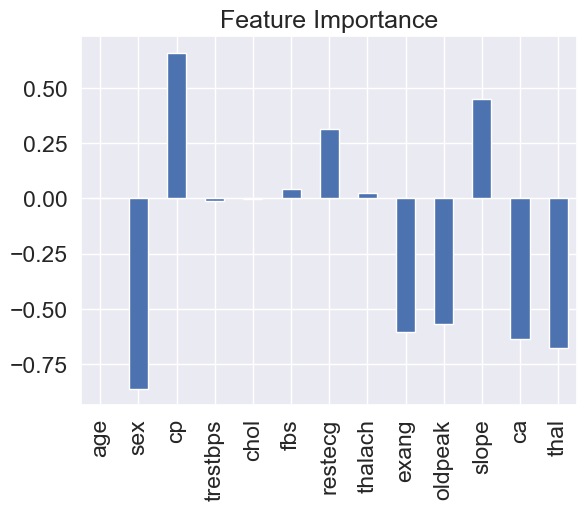

In [110]:
# Visualizing feature importance:

feature_df = pd.DataFrame(feature_dict, index=[0])

feature_df.T.plot.bar(title="Feature Importance",
                     legend=False);

In [111]:
# Checking if the results make sense:

pd.crosstab(df.sex,df.target)

# Note that the RATIO is analysed (72/24 > 93/114)

target,0,1
sex,,
0,24,72
1,114,93


In [112]:
pd.crosstab(df.slope,df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


# 6. Experimentation

Was the evaluation metric defined in the begining of the project met?

If not, there are some steps to follow:

1. Collect more data


2. Trying a better model (Like CatBoost or XGBoost)


3. Improving the existing model (if possible)


If the model performed well, it is interesting to save/export it.